# Notebook to explore impact of phase shifter swing on IQ modulator 

The idea of this notebook is to provide insight on the tradeoff of swing and constellation shape.
Change the size of the modulation and observe a scaling of constellations.

In [1]:
from IPython.display import Image
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pi = np.pi

## Definition of signals

First we need to define singals to enter into the following equation:

![](img/Electric_field_eq.png "Electric field from [1]")

In [2]:
denom       = 3
delta_phi_I = np.array([1,-1, -1,1,1/denom,-1/denom,-1/denom,1/denom,1/denom,-1/denom,-1,-1,-1/denom,1/denom,1,1])*pi/6
delta_phi_Q = np.array([1, 1,-1,-1,1/denom,1/denom,-1/denom,-1/denom,1,1,1/denom,-1/denom,-1,-1,-1/denom,1/denom])*pi/6

Text(0, 0.5, '$\\Phi_Q$: Phase in Q as a fraction of $\\pi$')

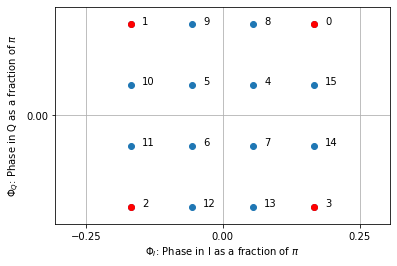

In [3]:
%matplotlib inline
plt.scatter(delta_phi_I/pi,delta_phi_Q/pi)
plt.scatter(delta_phi_I[0:4]/pi,delta_phi_Q[0:4]/pi,c='red')

plt.xticks(np.arange(-1, 1.25, step=0.25))  # Set label locations.
plt.yticks(np.arange(-1, 1.25, step=0.25))  # Set label locations.
plt.grid(1)
for i, txt in enumerate(range(len(delta_phi_I))):
    plt.annotate(txt, (delta_phi_I[i]/pi+0.02, delta_phi_Q[i]/pi))
plt.axis('equal')
plt.xlabel("$\Phi_I$: Phase in I as a fraction of $\pi$")
plt.ylabel("$\Phi_Q$: Phase in Q as a fraction of $\pi$")

## Plot of transmission functions of field and power

Text(0, 0.5, "Scaling of $E_0$ on 'I' axis")

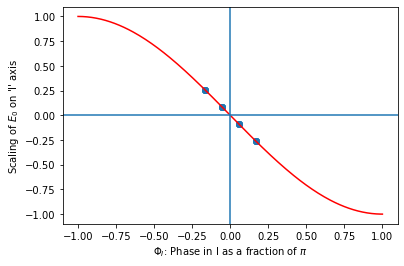

In [4]:
%matplotlib inline
#%matplotlib qt
N  = 200;
N2 = N/4;
lineWidth = 1;

x = np.linspace(0,2*pi,N)
y = np.cos(x/2)
f = plt.figure(1)
ax = plt.gca(); 
h = ax.plot(x/pi-1,y,'-r');
#'LineWidth',lineWidth,'MarkerFaceColor','red','MarkerSize',15
plt.axhline(0, 0, 1, label='horizontal line')
plt.axvline(0, 0, 1, label='horizontal line')
plt.scatter((delta_phi_I+pi)/pi-1,np.cos(delta_phi_I/2+pi/2))
plt.xlabel("$\Phi_I$: Phase in I as a fraction of $\pi$")
plt.ylabel("Scaling of $E_0$ on 'I' axis")

Text(0, 0.5, "Scaling of $P_0$ on 'I' axis")

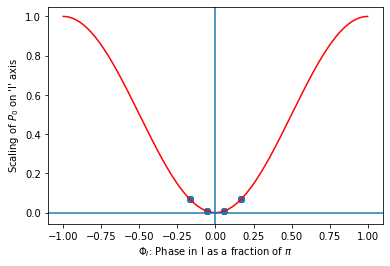

In [5]:
x2 = np.linspace(0,2*pi,N)
y2 = np.cos(x2/2)**2
f2 = plt.figure(2)
ax2 = plt.gca()
h2 = ax2.plot(x2/(pi)-1,y2,'-r')
plt.axhline(0, 0, 1, label='Horizontal line')
plt.axvline(0, 0, 1, label='Vertical line')
plt.scatter((delta_phi_I+pi)/pi-1,np.cos(delta_phi_I/2+pi/2)**2)
plt.xlabel("$\Phi_I$: Phase in I as a fraction of $\pi$")
plt.ylabel("Scaling of $P_0$ on 'I' axis")

Text(0, 0.5, "Scaling of $\\sqrt{P_0}$ on 'I' axis")

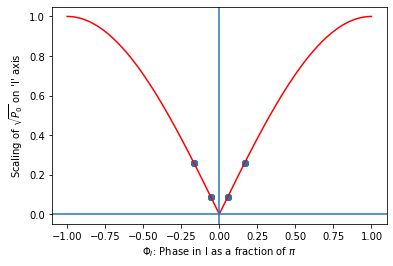

In [7]:
x3 = np.linspace(0,2*pi,N)
y3 = np.sqrt(np.cos(x2/2)**2)
f3 = plt.figure(3)
ax3 = plt.gca()
h3 = ax3.plot(x3/(pi)-1,y3,'-r')
plt.axhline(0, 0, 1, label='horizontal line')
plt.axvline(0, 0, 1, label='horizontal line')
plt.scatter((delta_phi_I+pi)/pi-1,np.sqrt(np.cos(delta_phi_I/2+pi/2)**2))
plt.xlabel("$\Phi_I$: Phase in I as a fraction of $\pi$")
plt.ylabel("Scaling of $\sqrt{P_0}$ on 'I' axis")


In [8]:
np.sqrt(np.cos(delta_phi_I[0:2]/2+pi/2)**2)

array([0.25881905, 0.25881905])

### Plot of quadrature after transmission

In [9]:
E_0 = 1
alpha = 1
L  = 1
E = np.cos(delta_phi_I/2+pi/2) + 1j*np.cos(delta_phi_Q/2+pi/2)

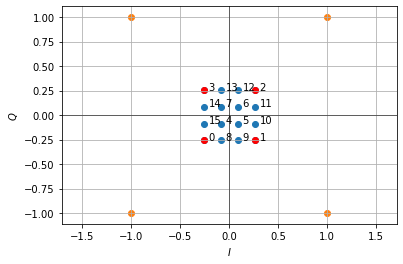

In [10]:
%matplotlib inline
fig_quadrature = plt.figure()
ax_quadrature = plt.gca()
h_quadrature = ax_quadrature.scatter(np.real(E),np.imag(E))
h_quadrature = ax_quadrature.scatter(np.real(E[0:4]),np.imag(E[0:4]),c='red')
ax_quadrature.scatter([1,-1,-1,1],[1,1,-1,-1])
plt.axis('equal')
plt.xlabel("$I$")
plt.ylabel("$Q$")
plt.axhline(0, 0, 1, label='Horizontal line',c='black',linewidth=.5)
plt.axvline(0, 0, 1, label='Vertical line',c='black',linewidth=.5)
plt.grid()
for i, txt in enumerate(range(len(E))):
    ax_quadrature.annotate(txt, (np.real(E[i])+0.05, np.imag(E[i])))

In [10]:
np.sin(0)

0.0

In [11]:
1/np.sqrt(pi/(4*3))

1.9544100476116797

In [12]:
1/np.sqrt(15*pi/180)

1.9544100476116797

In [13]:
1/np.sqrt(np.cos(15*pi/180))

1.0174852236814464

In [14]:
np.cos(15*pi/180)

0.9659258262890683

In [15]:
1/np.cos(pi/(4))

1.414213562373095

In [16]:
P_scaling = np.cos(delta_phi_I/2+pi/2)**2

In [17]:
P_scaling[0]

0.0669872981077806

In [18]:
E_scaling = np.sqrt(P_scaling)
E_scaling[0]

0.25881904510252063